In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import ShuffleSplit
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

In [2]:
df = pd.read_csv("datasets/Deep_Learning_task_train_dataset.csv", sep=',')
train = df
test_df = pd.read_csv("datasets/Deep_Learning_task_test_dataset.csv", sep=',')
test = test_df.copy()

## Inspection

In [3]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,NCF31,9.130,Low Fat,0.051928,Household,151.4024,OUT049,1999,Medium,Tier 1,Supermarket Type1,NaN
1,FDD59,10.500,Regular,0.000000,Starchy Foods,78.2960,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN
2,FDQ52,17.000,Low Fat,0.119571,Frozen Foods,249.7434,OUT049,1999,Medium,Tier 1,Supermarket Type1,NaN
3,FDP09,NaN,Low Fat,0.033726,Snack Foods,211.6902,OUT027,1985,Medium,Tier 3,Supermarket Type3,NaN
4,FDK24,9.195,Low Fat,0.101276,Baking Goods,46.4744,OUT035,2004,Small,Tier 2,Supermarket Type1,NaN


The value range difference tells us that the dataset should be normalized.<br>
I'd also like to investigate more the minimum values of <b>Item_Visibility</b>

In [5]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,4182.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,12.959605,0.065671,141.344520,1997.900800,2188.381667
std,4.661704,0.051206,62.401514,8.290423,1703.131187
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.890000,0.026839,94.119250,1987.000000,846.231800
50%,12.800000,0.054251,143.315400,1999.000000,1808.312800
75%,17.100000,0.093850,186.472700,2004.000000,3091.975200
max,21.350000,0.328391,266.888400,2009.000000,11445.102000


In [6]:
test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,2878.000000,3523.000000,3523.000000,3523.000000,0.0
mean,12.709487,0.066786,140.493580,1997.734033,NaN
std,4.613606,0.052149,62.100594,8.486081,NaN
min,4.555000,0.000000,31.490000,1985.000000,NaN
25%,8.630000,0.027577,93.496200,1987.000000,NaN
50%,12.500000,0.053482,142.481200,1999.000000,NaN
75%,16.700000,0.095462,184.658200,2004.000000,NaN
max,21.350000,0.311090,266.888400,2009.000000,NaN


Checking the data type

In [7]:
train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [8]:
test.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

Checking for null-values

In [9]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                   818
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1439
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [10]:
test.isnull().sum()

Item_Identifier                 0
Item_Weight                   645
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                   971
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            3523
dtype: int64

In [11]:
train.shape[0]

5000

Listing categorical values.

In [12]:
train['Item_Fat_Content'].unique().tolist()

['Low Fat', 'Regular', 'low fat', 'LF', 'reg']

In [13]:
test['Item_Fat_Content'].unique().tolist()

['Low Fat', 'Regular', 'reg', 'LF', 'low fat']

In [14]:
train['Item_Type'].unique().tolist()

['Dairy',
 'Soft Drinks',
 'Meat',
 'Fruits and Vegetables',
 'Household',
 'Baking Goods',
 'Snack Foods',
 'Frozen Foods',
 'Breakfast',
 'Health and Hygiene',
 'Hard Drinks',
 'Canned',
 'Breads',
 'Starchy Foods',
 'Others',
 'Seafood']

In [15]:
test['Item_Type'].unique().tolist()

['Household',
 'Starchy Foods',
 'Frozen Foods',
 'Snack Foods',
 'Baking Goods',
 'Fruits and Vegetables',
 'Canned',
 'Soft Drinks',
 'Health and Hygiene',
 'Dairy',
 'Meat',
 'Seafood',
 'Hard Drinks',
 'Breads',
 'Others',
 'Breakfast']

In [16]:
train['Outlet_Size'].unique().tolist()

['Medium', nan, 'High', 'Small']

In [17]:
test['Outlet_Size'].unique().tolist()

['Medium', 'Small', nan, 'High']

In [18]:
train['Outlet_Location_Type'].unique().tolist()

['Tier 1', 'Tier 3', 'Tier 2']

In [19]:
test['Outlet_Location_Type'].unique().tolist()

['Tier 1', 'Tier 3', 'Tier 2']

In [20]:
train['Outlet_Type'].unique().tolist()

['Supermarket Type1',
 'Supermarket Type2',
 'Grocery Store',
 'Supermarket Type3']

In [21]:
test['Outlet_Type'].unique().tolist()

['Supermarket Type1',
 'Supermarket Type3',
 'Grocery Store',
 'Supermarket Type2']

# Pre-processing
Reference source<br>
https://towardsdatascience.com/preprocessing-with-sklearn-a-complete-and-comprehensive-guide-670cb98fcfb9
## Null-values
Replacing null values with the mean value for <b>Item_Weight</b> and the middle value <i>Medium</i> for <b>Outlet_Size</b>.

In [22]:
train['Item_Weight'] = train['Item_Weight'].fillna(train['Item_Weight'].mean())
train['Outlet_Size'] = train['Outlet_Size'].fillna('Medium')
train.isnull().any().sum()

0

In [23]:
test['Item_Weight'] = train['Item_Weight'].fillna(test['Item_Weight'].mean())
test['Outlet_Size'] = train['Outlet_Size'].fillna('Medium')
test.drop(['Item_Outlet_Sales'], axis=1).isnull().any().sum()

0

## Unique values
Removing item identifier values.

In [24]:
train.drop(['Item_Identifier'], axis=1, inplace=True)
test.drop(['Item_Identifier'], axis=1, inplace=True)

## Category features
These must be <b>cleaned</b>, <b>screened</b> and <b>converted</b>.<br>
How they are converted is based on the type they are, <b>ordinal</b> or <b>nominal</b>.<br>
An ordinal feature has natural, ordered categories and the distance between each is not known.<br>

### Category cleaning
Before converting, I'll merge category variants of the same type.

In [25]:
print(train['Item_Fat_Content'].unique().tolist())
train['Item_Fat_Content'] = train['Item_Fat_Content'].replace('low fat', 'Low Fat')
train['Item_Fat_Content'] = train['Item_Fat_Content'].replace('LF', 'Low Fat')
train['Item_Fat_Content'] = train['Item_Fat_Content'].replace('reg', 'Regular')
print(train['Item_Fat_Content'].unique().tolist())

['Low Fat', 'Regular', 'low fat', 'LF', 'reg']
['Low Fat', 'Regular']


In [26]:
print(test['Item_Fat_Content'].unique().tolist())
test['Item_Fat_Content'] = test['Item_Fat_Content'].replace('low fat', 'Low Fat')
test['Item_Fat_Content'] = test['Item_Fat_Content'].replace('LF', 'Low Fat')
test['Item_Fat_Content'] = test['Item_Fat_Content'].replace('reg', 'Regular')
print(test['Item_Fat_Content'].unique().tolist())

['Low Fat', 'Regular', 'reg', 'LF', 'low fat']
['Low Fat', 'Regular']


### Category screening
Get a list of unique category types and list the number of values for each one.<br>
If a category has too few values, it might make it harder to predict accurate prices.

In [27]:
categories = train["Item_Fat_Content"].value_counts().keys().tolist()
counts = train["Item_Fat_Content"].value_counts().tolist()
print(categories)
print(counts)

['Low Fat', 'Regular']
[3253, 1747]


In [28]:
categories = test["Item_Fat_Content"].value_counts().keys().tolist()
counts = test["Item_Fat_Content"].value_counts().tolist()
print(categories)
print(counts)

['Low Fat', 'Regular']
[2264, 1259]


In [29]:
categories = train['Item_Type'].value_counts().keys().tolist()
counts = train['Item_Type'].value_counts().tolist()
print(categories)
print(counts)

['Fruits and Vegetables', 'Snack Foods', 'Household', 'Frozen Foods', 'Dairy', 'Canned', 'Baking Goods', 'Health and Hygiene', 'Soft Drinks', 'Meat', 'Breads', 'Hard Drinks', 'Others', 'Starchy Foods', 'Breakfast', 'Seafood']
[733, 702, 532, 515, 401, 389, 370, 274, 265, 251, 153, 128, 96, 86, 66, 39]


The results from Item_Types in the train dataset shows that this column contains the categories with few values.<br>
Consider removal of some of the categories to see if it makes a noticable difference in predictions.

In [30]:
categories = test['Item_Type'].value_counts().keys().tolist()
counts = test['Item_Type'].value_counts().tolist()
print(categories)
print(counts)

['Fruits and Vegetables', 'Snack Foods', 'Household', 'Frozen Foods', 'Dairy', 'Baking Goods', 'Canned', 'Health and Hygiene', 'Soft Drinks', 'Meat', 'Breads', 'Hard Drinks', 'Others', 'Starchy Foods', 'Breakfast', 'Seafood']
[499, 498, 378, 341, 281, 278, 260, 246, 180, 174, 98, 86, 73, 62, 44, 25]


In [31]:
categories = train['Outlet_Establishment_Year'].value_counts().keys().tolist()
counts = train['Outlet_Establishment_Year'].value_counts().tolist()
print(categories)
print(counts)

[1985, 2002, 1997, 2004, 1987, 2007, 1999, 2009, 1998]
[818, 569, 559, 559, 558, 542, 541, 526, 328]


In [32]:
categories = test['Outlet_Establishment_Year'].value_counts().keys().tolist()
counts = test['Outlet_Establishment_Year'].value_counts().tolist()
print(categories)
print(counts)

[1985, 2009, 1999, 2007, 1987, 1997, 2004, 2002, 1998]
[645, 402, 389, 384, 374, 371, 371, 360, 227]


In [33]:
categories = train['Outlet_Size'].value_counts().keys().tolist()
counts = train['Outlet_Size'].value_counts().tolist()
print(categories)
print(counts)

['Medium', 'Small', 'High']
[3044, 1398, 558]


In [34]:
categories = test['Outlet_Size'].value_counts().keys().tolist()
counts = test['Outlet_Size'].value_counts().tolist()
print(categories)
print(counts)

['Medium', 'Small', 'High']
[2125, 1009, 389]


In [35]:
categories = train['Outlet_Location_Type'].value_counts().keys().tolist()
counts = train['Outlet_Location_Type'].value_counts().tolist()
print(categories)
print(counts)

['Tier 3', 'Tier 2', 'Tier 1']
[1950, 1670, 1380]


In [36]:
categories = test['Outlet_Location_Type'].value_counts().keys().tolist()
counts = test['Outlet_Location_Type'].value_counts().tolist()
print(categories)
print(counts)

['Tier 3', 'Tier 2', 'Tier 1']
[1400, 1115, 1008]


In [37]:
categories = train['Outlet_Type'].value_counts().keys().tolist()
counts = train['Outlet_Type'].value_counts().tolist()
print(categories)
print(counts)

['Supermarket Type1', 'Grocery Store', 'Supermarket Type3', 'Supermarket Type2']
[3328, 608, 538, 526]


In [38]:
categories = test['Outlet_Type'].value_counts().keys().tolist()
counts = test['Outlet_Type'].value_counts().tolist()
print(categories)
print(counts)

['Supermarket Type1', 'Grocery Store', 'Supermarket Type2', 'Supermarket Type3']
[2249, 475, 402, 397]


### Ordinal conversion
Convertion of ordinal category types.

In [39]:
print(train['Item_Fat_Content'].unique().tolist())
train['Item_Fat_Content'] = pd.factorize(train['Item_Fat_Content'])[0]
print(train['Item_Fat_Content'].unique().tolist())

['Low Fat', 'Regular']
[0, 1]


In [40]:
print(test['Item_Fat_Content'].unique().tolist())
test['Item_Fat_Content'] = pd.factorize(test['Item_Fat_Content'])[0]
print(test['Item_Fat_Content'].unique().tolist())

['Low Fat', 'Regular']
[0, 1]


In [41]:
train = train.sort_values('Outlet_Size', ascending=False) # Sorting to get the right order
print(train['Outlet_Size'].unique().tolist())
train['Outlet_Size'] = pd.factorize(train['Outlet_Size'])[0]
print(train['Outlet_Size'].unique().tolist())

['Small', 'Medium', 'High']
[0, 1, 2]


In [42]:
test = test.sort_values('Outlet_Size', ascending=False)
print(test['Outlet_Size'].unique().tolist())
test['Outlet_Size'] = pd.factorize(test['Outlet_Size'])[0]
print(test['Outlet_Size'].unique().tolist())

['Small', 'Medium', 'High']
[0, 1, 2]


In [43]:
train = train.sort_values('Outlet_Location_Type', ascending=True)
print(train['Outlet_Location_Type'].unique().tolist())
train['Outlet_Location_Type'] = pd.factorize(train['Outlet_Location_Type'])[0]
print(train['Outlet_Location_Type'].unique().tolist())

['Tier 1', 'Tier 2', 'Tier 3']
[0, 1, 2]


In [44]:
test = test.sort_values('Outlet_Location_Type', ascending=True)
print(test['Outlet_Location_Type'].unique().tolist())
test['Outlet_Location_Type'] = pd.factorize(test['Outlet_Location_Type'])[0]
print(test['Outlet_Location_Type'].unique().tolist())

['Tier 1', 'Tier 2', 'Tier 3']
[0, 1, 2]


In [45]:
train = train.sort_values('Outlet_Type', ascending=True)
print(train['Outlet_Type'].unique().tolist())
train['Outlet_Type'] = pd.factorize(train['Outlet_Type'])[0]
print(train['Outlet_Type'].unique().tolist())

['Grocery Store', 'Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3']
[0, 1, 2, 3]


In [46]:
test = test.sort_values('Outlet_Type', ascending=True)
print(test['Outlet_Type'].unique().tolist())
test['Outlet_Type'] = pd.factorize(test['Outlet_Type'])[0]
print(test['Outlet_Type'].unique().tolist())

['Grocery Store', 'Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3']
[0, 1, 2, 3]


In [47]:
train = train.sort_index()
test = test.sort_index()
train.head()
print(train['Item_Visibility'].isnull().sum())

0


### Nominal conversion
Because both datasets contain the same nominal categories, we can process them at the same time.

OneHotEncoder reference<br>
https://towardsdatascience.com/preprocessing-with-sklearn-a-complete-and-comprehensive-guide-670cb98fcfb9

In [48]:
onehot = OneHotEncoder(dtype=np.int64, sparse=True)

cols = ['Item_Type', 'Outlet_Establishment_Year', 'Outlet_Identifier']

# Both datasets share the same categories, so we can use the same lists
item_types = train['Item_Type'].value_counts().keys().sort_values(ascending=True).tolist()
year_numbers = train['Outlet_Establishment_Year'].value_counts().keys().sort_values(ascending=True).tolist()
outlet_ids = train['Outlet_Identifier'].value_counts().keys().sort_values(ascending=True).tolist()

train_nominals = pd.DataFrame(onehot.fit_transform(train[cols]).toarray(),
                              columns=item_types + year_numbers + outlet_ids)
test_nominals = pd.DataFrame(onehot.fit_transform(test[cols]).toarray(),
                              columns=item_types + year_numbers + outlet_ids)

train_nominals.head()

,Baking Goods,Breads,Breakfast,Canned,Dairy,Frozen Foods,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,...,OUT010,OUT013,OUT017,OUT018,OUT019,OUT027,OUT035,OUT045,OUT046,OUT049
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0


In [49]:
# Join the nominal types with the existing dataset.
train = pd.concat([train, train_nominals], axis=1)
test = pd.concat([test, test_nominals], axis=1)

# Remove the columns that have been converted
train.drop(cols, axis=1, inplace=True)
test.drop(cols, axis=1, inplace=True)

train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Baking Goods,Breads,...,OUT010,OUT013,OUT017,OUT018,OUT019,OUT027,OUT035,OUT045,OUT046,OUT049
0,9.30,0,0.016047,249.8092,1,0,1,3735.1380,0,0,...,0,0,0,0,0,0,0,0,0,1
1,5.92,1,0.019278,48.2692,1,2,2,443.4228,0,0,...,0,0,0,1,0,0,0,0,0,0
2,17.50,0,0.016760,141.6180,1,0,1,2097.2700,0,0,...,0,0,0,0,0,0,0,0,0,1
3,19.20,1,0.000000,182.0950,1,2,0,732.3800,0,0,...,1,0,0,0,0,0,0,0,0,0
4,8.93,0,0.000000,53.8614,2,2,1,994.7052,0,0,...,0,1,0,0,0,0,0,0,0,0


## Normalization
Apply individual scaling to features in the range 0 to 1.

In [50]:
def normalizeMinMax(data):
    
    # fit scaler on training data
    scale = MinMaxScaler().fit(data)

    # transform data
    data_scale = pd.DataFrame(scale.transform(data), columns=data.columns)
    
    return data_scale, scale

In [51]:
# colums that should be scaled
norm_cols = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

# separate non-scalable and scalable features
train_non_norm_df = train.drop(norm_cols, axis=1)
train_norm_df, train_scale = normalizeMinMax(train[norm_cols]) # apply scaling

test_non_norm_df = test.drop(norm_cols, axis=1)
test_norm_df, test_scale = normalizeMinMax(test[norm_cols])

# join the two dataframes together again
train_norm = pd.concat([train_non_norm_df, train_norm_df], axis=1)
test_norm = pd.concat([test_non_norm_df, test_norm_df], axis=1)

# exclude Item_Outlet_Sales from the input data
train_X_norm = train_norm.drop('Item_Outlet_Sales', axis=1)
test_X_norm = test_norm.drop('Item_Outlet_Sales', axis=1)

# isolate Item_Outlet_Sales as target variable
train_y_norm = train['Item_Outlet_Sales']
test_y_norm = train['Item_Outlet_Sales']

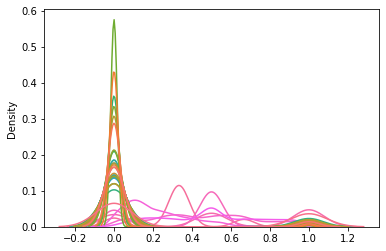

In [52]:
# display a plot for the input data distribution
sns.kdeplot(data=test_X_norm, legend=False)
plt.show()

# Architecture
My deep learning model is a Multilayer Perceptron (MLP).<br>
It uses the Sequential class with 2 hidden layers and the <i>RMSprop</i> algorithm as optimizer.<br>

I choose to use the <i>ShuffleSplit</i> class to perform cross-validation.<br>
This was especially usefull for training when trying out different parameters and algorithms due to the low amount of data in the dataset.

In [53]:
# I set model creation up as a function in order to easily test different combinations of layers
def create_new_model(num_neurons, num_inputs):
    
    model = Sequential()
    for i in range(0, len(num_neurons)):
        if i == 0:
            model.add(Dense(num_neurons[i], input_dim=num_inputs, kernel_initializer='normal', activation="relu"))
        else:
            model.add(Dense(num_neurons[i], kernel_initializer='normal', activation="relu"))
    model.add(Dense(1, activation="linear"))
    model.compile(loss="mse", optimizer=tf.keras.optimizers.RMSprop(0.0025))
    
    return model

In [54]:
# this function just encapsulates the whole process of running through the number of dataset splits,
# model creation, training, prediction and storing of results.
# returns the model with its weights
def run_train_model(num_neurons, num_epochs, num_splits, test_size):

    ss = ShuffleSplit(n_splits=num_splits, test_size=test_size, random_state=0)
    n_samples = len(train_norm)
    fold_var = 1

    for train_index, val_index in ss.split(train_X_norm):

        # split in training and testing sets
        X_train = train_X_norm.iloc[train_index]
        y_train = train_y_norm.iloc[train_index]
        X_test = train_X_norm.iloc[val_index]
        y_test = train_y_norm.iloc[val_index]

        print("fold_var:", fold_var, ", train_index: ", train_index[0:5], ", val_index: ", val_index[0:5])
        print("X_train:", X_train.shape, ", y_train:", y_train.shape, ", X_test:", X_test.shape, "y_test:", y_test.shape)

        # create model
        model = create_new_model(num_neurons, test_X_norm.shape[1])

        # build model
        history = model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), epochs=num_epochs)

        # generate predictions
        preds = model.predict(X_test)
        R2_SCORES.append(r2_score(y_test, preds))
        MAE.append(mean_absolute_error(y_test, preds))

        # store data for plotting
        LOSS.append(history.history['loss'])
        VALIDATION_LOSS.append(history.history['val_loss'])

        fold_var += 1
        
    return model

Here I configure some base options before starting the training process.

In [55]:
num_neurons = [21,10] # two hidden layers, first with 21 and second woth 10 neurons
num_epochs = 200
num_splits = 2
test_size = 0.25

R2_SCORES = []
MAE = []
LOSS = []
VALIDATION_LOSS = []

model = run_train_model(num_neurons, num_epochs, num_splits, test_size)

fold_var: 1 , train_index:  [4154 4820 1202 3759  622] , val_index:  [ 398 3833 4836 4572  636]
X_train: (3750, 42) , y_train: (3750,) , X_test: (1250, 42) y_test: (1250,)
Epoch 1/200
118/118 [==============================] - 1s 3ms/step - loss: 7517763.5000 - val_loss: 7538104.0000
Epoch 2/200
118/118 [==============================] - 0s 2ms/step - loss: 6813906.5000 - val_loss: 6427503.5000
Epoch 3/200
118/118 [==============================] - 0s 2ms/step - loss: 5347984.5000 - val_loss: 4659520.5000
Epoch 4/200
118/118 [==============================] - 0s 2ms/step - loss: 3516739.0000 - val_loss: 3021730.0000
Epoch 5/200
118/118 [==============================] - 0s 2ms/step - loss: 2455687.5000 - val_loss: 2578456.5000
Epoch 6/200
118/118 [==============================] - 0s 2ms/step - loss: 2259574.7500 - val_loss: 2453872.2500
Epoch 7/200
118/118 [==============================] - 0s 2ms/step - loss: 2157453.0000 - val_loss: 2344786.5000
Epoch 8/200
118/118 [================

## Evaluation
The R2 score should end up at around 0.58-0.59 consistently.

In [56]:
r2_avg = sum(R2_SCORES)/len(R2_SCORES)
print("r2 score: %.2f" % r2_avg, R2_SCORES)
print("mae: ", MAE)
print("test loss:", np.array(VALIDATION_LOSS)[:,-1])

r2 score: 0.60 [0.596741611124145, 0.5941313362019192]
mae:  [778.7207813113379, 798.8059395651172]
test loss: [1248869.5  1292117.25]


Plot learning curves

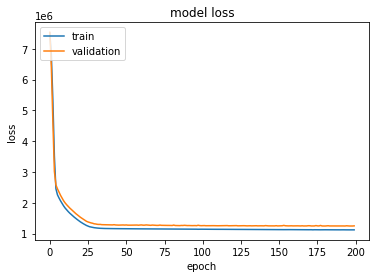

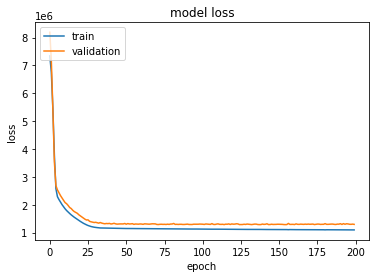

In [57]:
for i in range(len(LOSS)):
    plt.plot(LOSS[i])
    plt.plot(VALIDATION_LOSS[i])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

In [58]:
# get predictions for the test data
test_preds = model.predict(test_X_norm)

111/111 [==============================] - 0s 852us/step


In [59]:
# write the predicted prices to file
res1 = test_df[['Item_Identifier', 'Outlet_Identifier']]
res2 = pd.DataFrame(test_preds)
final_result = pd.concat([res1, res2], axis=1)
final_result.rename(columns={'0':'Item_Outlet_Sales'}, inplace=True)
final_result.to_csv('problem_3_predictions.csv', index=False)